<a href="https://colab.research.google.com/github/lala991204/DL-self-study/blob/master/tensorflow/4_1_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

간단한 모델을 생성해보자.

# 데이터 로드 및 전처리

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape) 

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


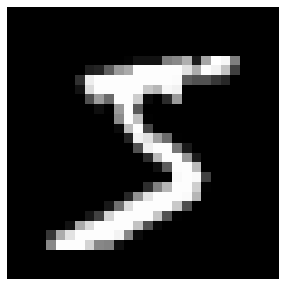

In [3]:
# sample image 출력

def plot_image(data, idx):
    plt.figure(figsize=(5,5))
    plt.imshow(data[idx], cmap='gray')
    plt.axis("off")
    plt.show()

plot_image(x_train, 0)

In [4]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())
print('\n')

# Normalization (for stable training of deep learning model)
x_train = x_train/255.0
x_valid  = x_valid/255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())
print('\n')

# channel 추가
print(x_train.shape, x_valid.shape)
x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]
print(x_train_in.shape, x_valid_in.shape)

0 255
0 255


0.0 1.0
0.0 1.0


(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


mnist dataset은 색상을 나타내는 channel이 1개인 모노 컬러 이미지로 구성되며, CNN 모델에 주입하기 위해 색상을 나타내는 channel을 추가해준다.

# Sequential API로 모델 생성 및 학습

Sequential API 이용하여 합성곱 레이어 1개, 풀링 레이어 1개를 적용하는 simple model을 만들어보자. 

In [5]:
# Sequential API 사용해 sample model 생성
model = tf.keras.Sequential([
        # Convolution 적용(32 filters)
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu',      # (3,3)크기의 서로 다른 32가지의 kernel(filter) 적용 => 32가지 종류의 피처(특징)추출.
                               input_shape=(28,28,1), name='conv'),
        # Max Pooling 적용
        tf.keras.layers.MaxPooling2D((2, 2), name='pool'),
        # Classifier 출력층
        tf.keras.layers.Flatten(),                      # dense layer 적용 전에 1차원 배열로 펼쳐주는 과정 필요.
        tf.keras.layers.Dense(10, activation='softmax'),           # 다중 분류 문제 -> softmax 이용!
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train,
          validation_data=(x_valid_in, y_valid),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 30s 15ms/step - loss: 0.2330 - accuracy: 0.9329 - val_loss: 0.1083 - val_accuracy: 0.9673
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0852 - accuracy: 0.9755 - val_loss: 0.0672 - val_accuracy: 0.9789
Epoch 3/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0638 - accuracy: 0.9811 - val_loss: 0.0586 - val_accuracy: 0.9803
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0511 - accuracy: 0.9849 - val_loss: 0.0551 - val_accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0434 - accuracy: 0.9872 - val_loss: 0.0529 - val_accuracy: 0.9835
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0364 - accuracy: 0.9890 - val_loss: 0.0522 - val_accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0314 - accuracy: 0.9905 - val_loss: 0.0523 -

In [6]:
# 모델의 학습된 가중치 이용하여 loss, metrics 계산
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 2s 6ms/step - loss: 0.0625 - accuracy: 0.9826


[0.06248454004526138, 0.9825999736785889]

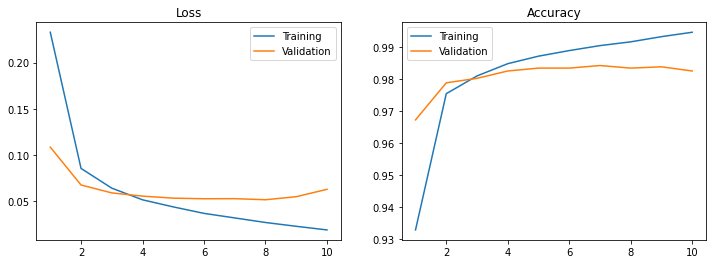

In [7]:
def plot_loss_acc(history, epoch):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 10)

training set에 대한 loss는 줄어드는 반면, validation set에 대한 loss는 어느 수준에서 더 이상 낮아지지 않는다. 특히,
4 epoch 이후부터 model이 overfitting(과대적합)으로 진행되었다는 것을 파악할 수 있다.

# 모델 구조 파악

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


가장 앞의 축(axis=0)의 None 값은 batch size가 들어오는 위치로서 어떤 값이든 가능하다는 의미이다.

In [9]:
# 입력 텐서 형태
print(model.input)

# 출력 텐서 형태
print(model.output)

# 레이어
print(model.layers)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv_input'), name='conv_input', description="created by layer 'conv_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense/Softmax:0', description="created by layer 'dense'")
[<keras.layers.convolutional.Conv2D object at 0x7f0676c682d0>, <keras.layers.pooling.MaxPooling2D object at 0x7f0676cf5290>, <keras.layers.core.flatten.Flatten object at 0x7f0676c8ae90>, <keras.layers.core.dense.Dense object at 0x7f06767491d0>]


In [10]:
## 첫 번째 레이어

print(model.layers[0])
print(model.layers[0].input)
print(model.layers[0].output)
print('\n')

print(model.layers[0].weights)     # 각 layer의 가중치 행렬 추출 가능!

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv_input'), name='conv_input', description="created by layer 'conv_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 26, 26, 32), dtype=tf.float32, name=None), name='conv/Relu:0', description="created by layer 'conv'")


[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 1.62279382e-01, -6.07560202e-02,  3.68335217e-01,
          -1.37127504e-01, -3.54800165e-01, -4.20060694e-01,
           1.18194386e-01, -3.51800889e-01,  2.00519308e-01,
          -9.82555449e-02,  1.63572446e-01, -5.77691257e-01,
          -2.15348110e-01, -1.28780231e-02, -2.28566423e-01,
           1.61815226e-01, -1.17647862e-02, -1.18486977e+00,
          -7.41966844e-01,  4.74795192e-01,  3.14206868e-01,
          -7.03584194e-01,  2.12674141e-01, -3.65741491e-01,
           7.67235637e-01,  5.16525626e-01, -3.74836549e-02,
           3.98467243e-01, -4.63050127e-01,  2.75596440e-01,
        

텐서플로 변수(tf.Variable)는 가중치와 같이 모델 학습 과정에 값이 업데이트되는 경우 사용한다. 위에서 보다시피, 커널(합성곱 필터) 행렬의 가중치와 각 커널의 상수항(bias)를 나타내는 변수가 있다.

In [11]:
# kernel 행렬의 가중치 또는 상수항을 따로 선택 가능.
print(model.layers[0].kernel)

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 1.62279382e-01, -6.07560202e-02,  3.68335217e-01,
          -1.37127504e-01, -3.54800165e-01, -4.20060694e-01,
           1.18194386e-01, -3.51800889e-01,  2.00519308e-01,
          -9.82555449e-02,  1.63572446e-01, -5.77691257e-01,
          -2.15348110e-01, -1.28780231e-02, -2.28566423e-01,
           1.61815226e-01, -1.17647862e-02, -1.18486977e+00,
          -7.41966844e-01,  4.74795192e-01,  3.14206868e-01,
          -7.03584194e-01,  2.12674141e-01, -3.65741491e-01,
           7.67235637e-01,  5.16525626e-01, -3.74836549e-02,
           3.98467243e-01, -4.63050127e-01,  2.75596440e-01,
          -3.45032990e-01,  5.05744278e-01]],

        [[ 1.35215819e-01, -5.84737837e-01,  1.26649335e-01,
           3.73684824e-01, -6.41687140e-02, -6.87296912e-02,
           5.63119769e-01, -8.88104588e-02, -1.17230482e-01,
           3.37205529e-01, -2.98772424e-01, -2.49888211e-01,
          -1.27822593e-01,  

위에서 (3,3)는 filter size, (1)은 input layer의 channel 개수, (32)는 output layer의 channel 개수. 따라서, layer[0]의 커널의 학습(update)가능한 파라미터의 수는 3*3*1*32 = 288개이다.

In [12]:
print(model.layers[0].bias)

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.3240827 , -0.0126978 , -0.34060857, -0.19895746, -0.0044928 ,
       -0.3316594 , -0.02876274, -0.2908599 , -0.00237737, -0.25074667,
       -0.19509496, -0.11049102, -0.08201238, -0.101666  ,  0.00301857,
       -0.20980729, -0.34629855, -0.01320264, -0.00846816,  0.20918182,
       -0.32063144, -0.3325088 , -0.02302908, -0.13179709,  0.00472157,
        0.04315751, -0.2947197 , -0.34543288, -0.32301605, -0.35353848,
       -0.32340282, -0.4626878 ], dtype=float32)>


위에서 상수항(bias) 가중치의 shape은 (32,)이고, 이는 출력층의 채널 수.
따라서, layer[0]의 총 학습 가능 파라미터 수는 커널과 상수항을 더한 288+32=320개.

In [14]:
# 레이어 이름 사용하여 레이어 선택
print(model.get_layer('conv'))

# sample image의 layer별 출력을 리스트에 추가(첫,두번째 레이어) => 이를 최종 출력으로 갖는 activator 모델 정의
activator = tf.keras.Model(inputs=model.input,
                           outputs=[layer.output for layer in model.layers[:2]])

# 첫 번째 샘플에 대해 각 layer의 출력 예측!
activations = activator.predict(x_train_in[0][tf.newaxis, ...])
print(len(activations))

2


(1, 26, 26, 32)


<function matplotlib.pyplot.show>

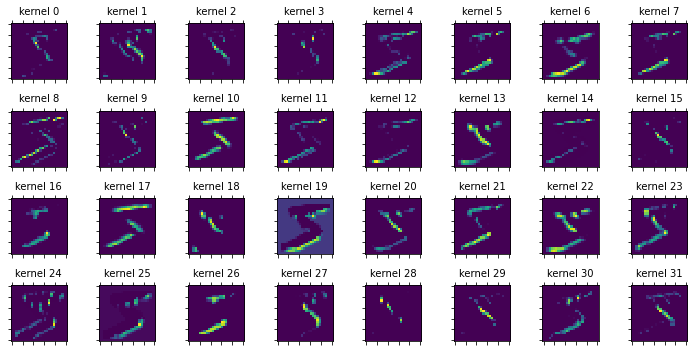

In [15]:
# 첫 번째 레이어(conv) 출력층
conv_activation = activations[0]
print(conv_activation.shape)     # 1: input image의 개수 즉, sample이 1개라는 뜻.

# Convolution 시각화(첫 번째 layer에서 출력되는 feature map image를 32개 커널별로 구분하여)
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0,:,:,i], cmap='viridis')      # 각 커널에 해당하는 부분 출력
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False) 
    plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show

이처럼 각 커널은 input image로부터 서로 다른 feature(특징) 추출하는 역할.

(1, 13, 13, 32)


<function matplotlib.pyplot.show>

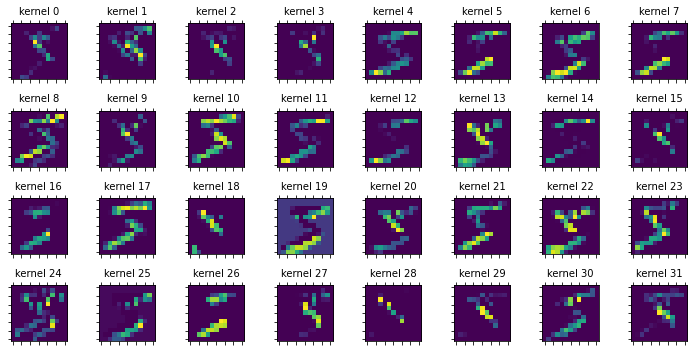

In [16]:
# 두 번째 레이어(pool) 출력층
pooling_activation = activations[1]
print(pooling_activation.shape)

# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0,:,:,i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show

Conv2D 출력 이미지에 비해 화소 크기가 굵어진 것을 볼 수 있다.
max pooling은 인근 pixel들을 모아 최대값으로 고정하기 때문에 픽셀 수는 줄이면서 특징을 더욱 강하게 드러내는 효과.